In [10]:
import numpy as np
import matplotlib.pyplot as plt
# オイラー法で2階微分方程式の数値階を得る関数
# t0:tの初期値
# v0:vの初期値
# x0:y初期値
# tmax:tの最大値
# x''+2γx'+w0^2x=0の微分方程式を解く
def euler_method_2ord(t0, v0, x0, tmax, w0, γ ,n=12):
    # t0~tmaxを2**n+1個に分割
    t = np.linspace(t0, tmax, 2**n + 1)
    
    # tの刻み幅Δt
    dt = t[1] - t[0]
    
    # tと同じ形状の未初期化配列を生成
    v = np.empty_like(t)
    x = np.empty_like(t)
    
    # v[0]に初期値y0を代入
    v[0] = v0
    x[0] = x0
    
    
    # オイラー法でt毎の数値解を計算
    for k in range(len(t) - 1):
        v[k+1] = v[k] - (2*γ*v[k]+w0*w0*x[k]) * dt
        x[k+1] = x[k] + v[k] * dt
    
    return t, v, x

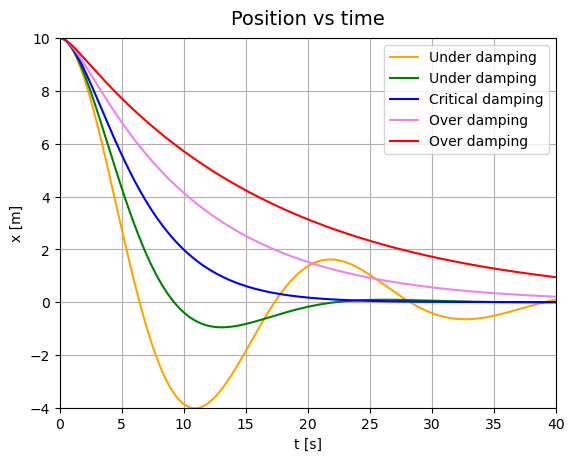

In [24]:
# γ=0.084, 0.18 (不足減衰) Under damping
# γ=0.30, (臨界減衰) Critical damping
# γ=0.5, 0.78 (過減衰) Over damping
γ = [0.084, 0.18, 0.30, 0.5, 0.78]
c = ["orange", "green", "blue", "violet", "red"]

# 高度の時間変化をプロット
plt.title("Position vs time", fontsize=14, pad=10)
plt.grid(True)
plt.xlim(0, 40)
plt.ylim(-4, 10)
plt.xlabel("t [s]")
plt.ylabel("x [m]")
for i in range(len(γ)):
    # オイラー法でx''+2γx'+w0^2x=0を解く (減衰振動)
    t, v, x = euler_method_2ord(0, 0, 10, 40, 0.3, γ[i])
    if (i==0 or i==1) :
        label_name = "Under damping"
    elif (i==2) :
        label_name = "Critical damping"
    else: 
        label_name = "Over damping"
    plt.plot(t, x, color=c[i],label=label_name)

# 凡例を表示
plt.legend()

plt.show()